# Домашнее задание 2 по машинному обучению


## 1. Подготовка данных

In [66]:
!pip install pandas seaborn scikit-learn matplotlib

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error
from sklearn.metrics import root_mean_squared_error
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)
sns.set_palette("husl")

In [47]:
df = pd.read_csv('./Customers.csv')
print("Основная информация о датасете:")
print(df.info())
print("\nПервые 5 строк:")
print(df.head())

Основная информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB
None

Первые 5 строк:
   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1    Male   19              15000                      39   
1           2    Male   21              35000                      81   
2           3  Female   20              86000    

In [48]:
df['Gender'] = df['Gender'].astype('category')
df['Profession'] = df['Profession'].astype('category')

print("Информация о типах данных после преобразования:")
print(df.dtypes)
print("\nПроверка пропусков:")
print(df.isnull().sum())

Информация о типах данных после преобразования:
CustomerID                   int64
Gender                    category
Age                          int64
Annual Income ($)            int64
Spending Score (1-100)       int64
Profession                category
Work Experience              int64
Family Size                  int64
dtype: object

Проверка пропусков:
CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64


In [49]:
y = df['Spending Score (1-100)']
X = df.drop(['Spending Score (1-100)', 'CustomerID'], axis=1)

print(f"Целевая переменная: {y.name}")
print(f"Размер целевой переменной: {y.shape}")
print(f"\nПризнаки: {list(X.columns)}")
print(f"Размер матрицы признаков: {X.shape}")

Целевая переменная: Spending Score (1-100)
Размер целевой переменной: (2000,)

Признаки: ['Gender', 'Age', 'Annual Income ($)', 'Profession', 'Work Experience', 'Family Size']
Размер матрицы признаков: (2000, 6)


## 2. EDA (Разведочный анализ данных)

Проводим анализ влияния каждого признака на целевую переменную Spending Score.

### 2.1 Анализ категориальных признаков


Распределение по полу:
Gender
Female    1186
Male       814
Name: count, dtype: int64

Пропорции: 
Gender
Female    59.3
Male      40.7
Name: proportion, dtype: float64


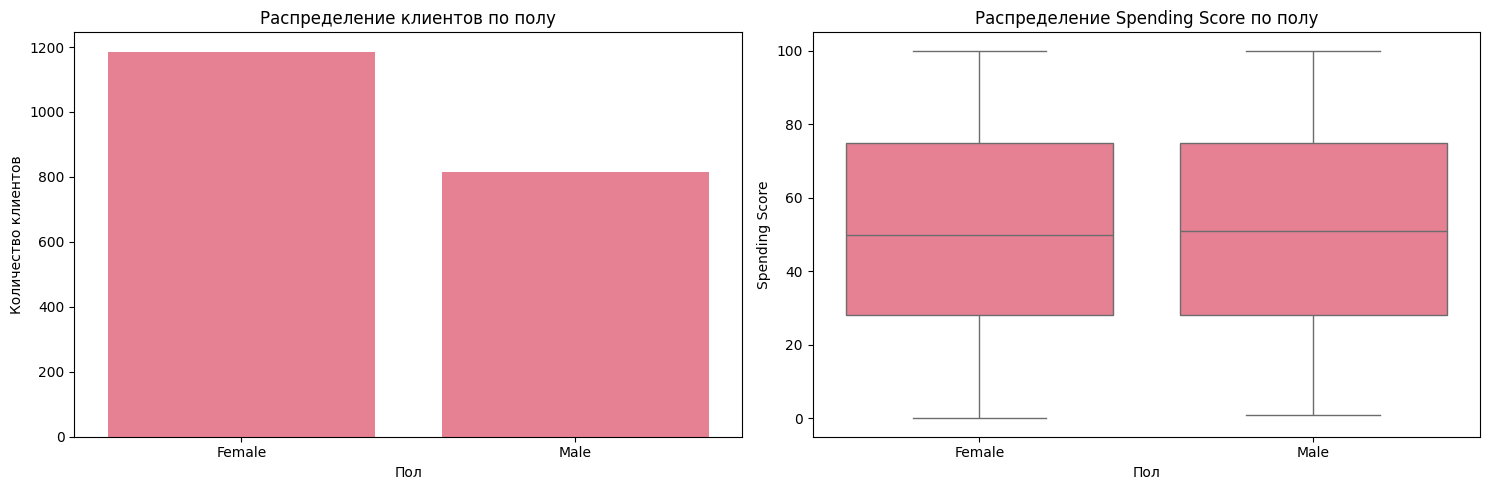


Статистика Spending Score по полу:
         count       mean        std  min   25%   50%   75%    max
Gender                                                            
Female  1186.0  50.974705  28.032580  0.0  28.0  50.0  75.0  100.0
Male     814.0  50.944717  27.808573  1.0  28.0  51.0  75.0  100.0


In [50]:
print("\nРаспределение по полу:")
print(df['Gender'].value_counts())
print(f"\nПропорции: \n{df['Gender'].value_counts(normalize=True) * 100}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(data=df, x='Gender', ax=ax1)
ax1.set_title('Распределение клиентов по полу')
ax1.set_xlabel('Пол')
ax1.set_ylabel('Количество клиентов')

sns.boxplot(data=df, x='Gender', y='Spending Score (1-100)', ax=ax2)
ax2.set_title('Распределение Spending Score по полу')
ax2.set_xlabel('Пол')
ax2.set_ylabel('Spending Score')

plt.tight_layout()
plt.show()

print("\nСтатистика Spending Score по полу:")
print(df.groupby('Gender')['Spending Score (1-100)'].describe())


Распределение по профессиям:
Profession
Artist           612
Healthcare       339
Entertainment    234
Engineer         179
Doctor           161
Executive        153
Lawyer           142
Marketing         85
Homemaker         60
Name: count, dtype: int64

Количество уникальных профессий: 9
Пропуски в Profession: 35


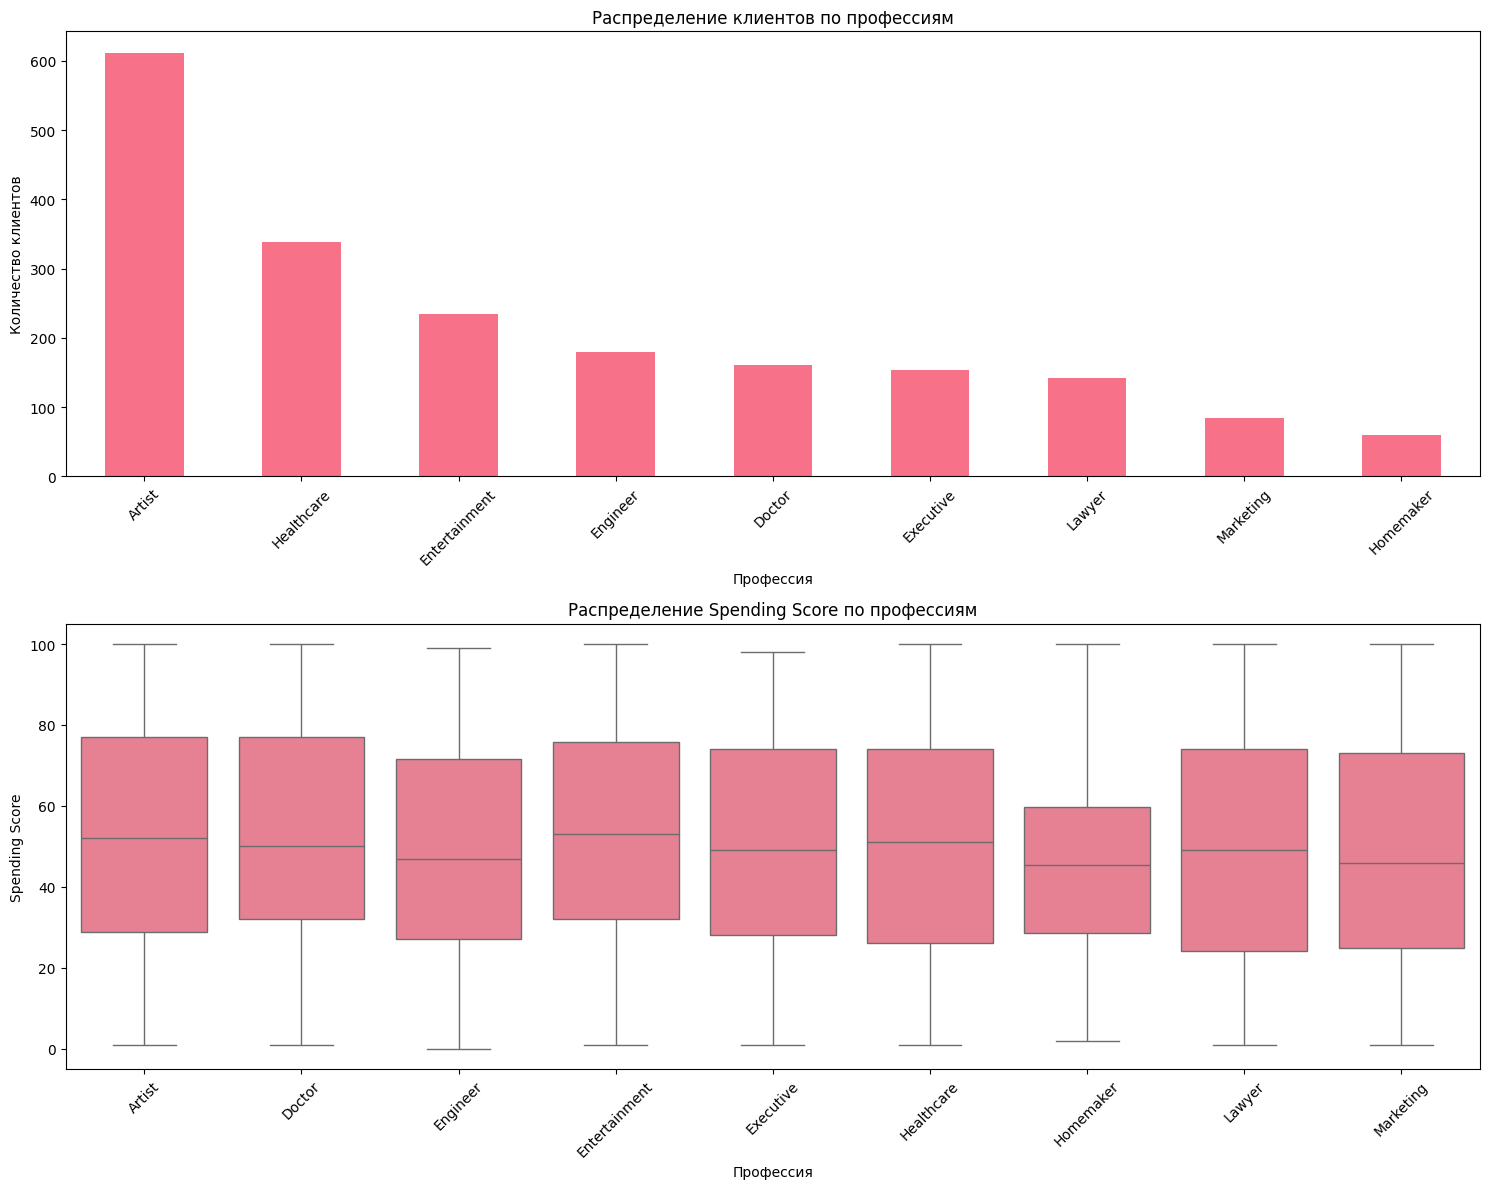


Статистика Spending Score по профессиям:
               count       mean        std  min    25%   50%    75%    max
Profession                                                                
Artist         612.0  52.678105  28.404190  1.0  28.75  52.0  77.00  100.0
Doctor         161.0  51.900621  27.437703  1.0  32.00  50.0  77.00  100.0
Engineer       179.0  48.966480  27.733868  0.0  27.00  47.0  71.50   99.0
Entertainment  234.0  52.940171  26.455985  1.0  32.00  53.0  75.75  100.0
Executive      153.0  49.901961  28.102202  1.0  28.00  49.0  74.00   98.0
Healthcare     339.0  50.516224  28.344492  1.0  26.00  51.0  74.00  100.0
Homemaker       60.0  46.383333  28.394373  2.0  28.50  45.5  59.75  100.0
Lawyer         142.0  48.859155  27.718594  1.0  24.25  49.0  74.00  100.0
Marketing       85.0  48.717647  28.924208  1.0  25.00  46.0  73.00  100.0


In [51]:
print("\nРаспределение по профессиям:")
print(df['Profession'].value_counts())
print(f"\nКоличество уникальных профессий: {df['Profession'].nunique()}")
print(f"Пропуски в Profession: {df['Profession'].isnull().sum()}")

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

profession_counts = df['Profession'].value_counts()
profession_counts.plot(kind='bar', ax=ax1)
ax1.set_title('Распределение клиентов по профессиям')
ax1.set_xlabel('Профессия')
ax1.set_ylabel('Количество клиентов')
ax1.tick_params(axis='x', rotation=45)

df_no_na = df.dropna(subset=['Profession'])
sns.boxplot(data=df_no_na, x='Profession', y='Spending Score (1-100)', ax=ax2)
ax2.set_title('Распределение Spending Score по профессиям')
ax2.set_xlabel('Профессия')
ax2.set_ylabel('Spending Score')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\nСтатистика Spending Score по профессиям:")
print(df.groupby('Profession')['Spending Score (1-100)'].describe())

### Выводы по категориальным признакам:

**Gender (Пол):**
- В датасете представлены клиенты обоих полов в примерно равных пропорциях
- Распределение Spending Score для обеих групп широкое
- Признак Gender может оказывать влияние на целевую переменную

**Profession (Профессия):**
- В данных представлено много различных профессий, наиболее частые: Artist, Healthcare, Doctor
- Есть 35 пропусков в этом столбце, которые необходимо обработать
- Разные профессии показывают заметные различия в средних значениях Spending Score
- Некоторые профессии (например, Healthcare) показывают более высокие средние значения расходов
- Этот признак может быть важным для модели

### 2.2 Анализ числовых признаков

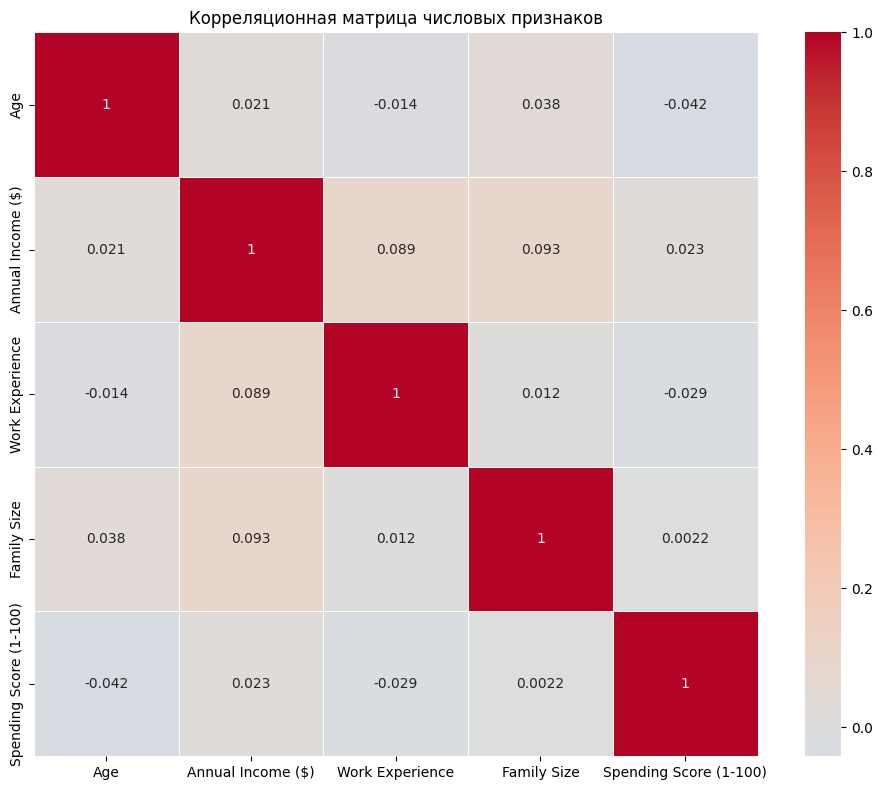

Spending Score (1-100)    1.000000
Annual Income ($)         0.023299
Family Size               0.002232
Work Experience          -0.028948
Age                      -0.041798
Name: Spending Score (1-100), dtype: float64


In [52]:
numeric_cols = ['Age', 'Annual Income ($)', 'Work Experience', 'Family Size', 'Spending Score (1-100)']
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
           square=True, linewidths=0.5)
plt.title('Корреляционная матрица числовых признаков')
plt.tight_layout()
plt.show()

correlations = df[numeric_cols].corr()['Spending Score (1-100)'].sort_values(ascending=False)
print(correlations)

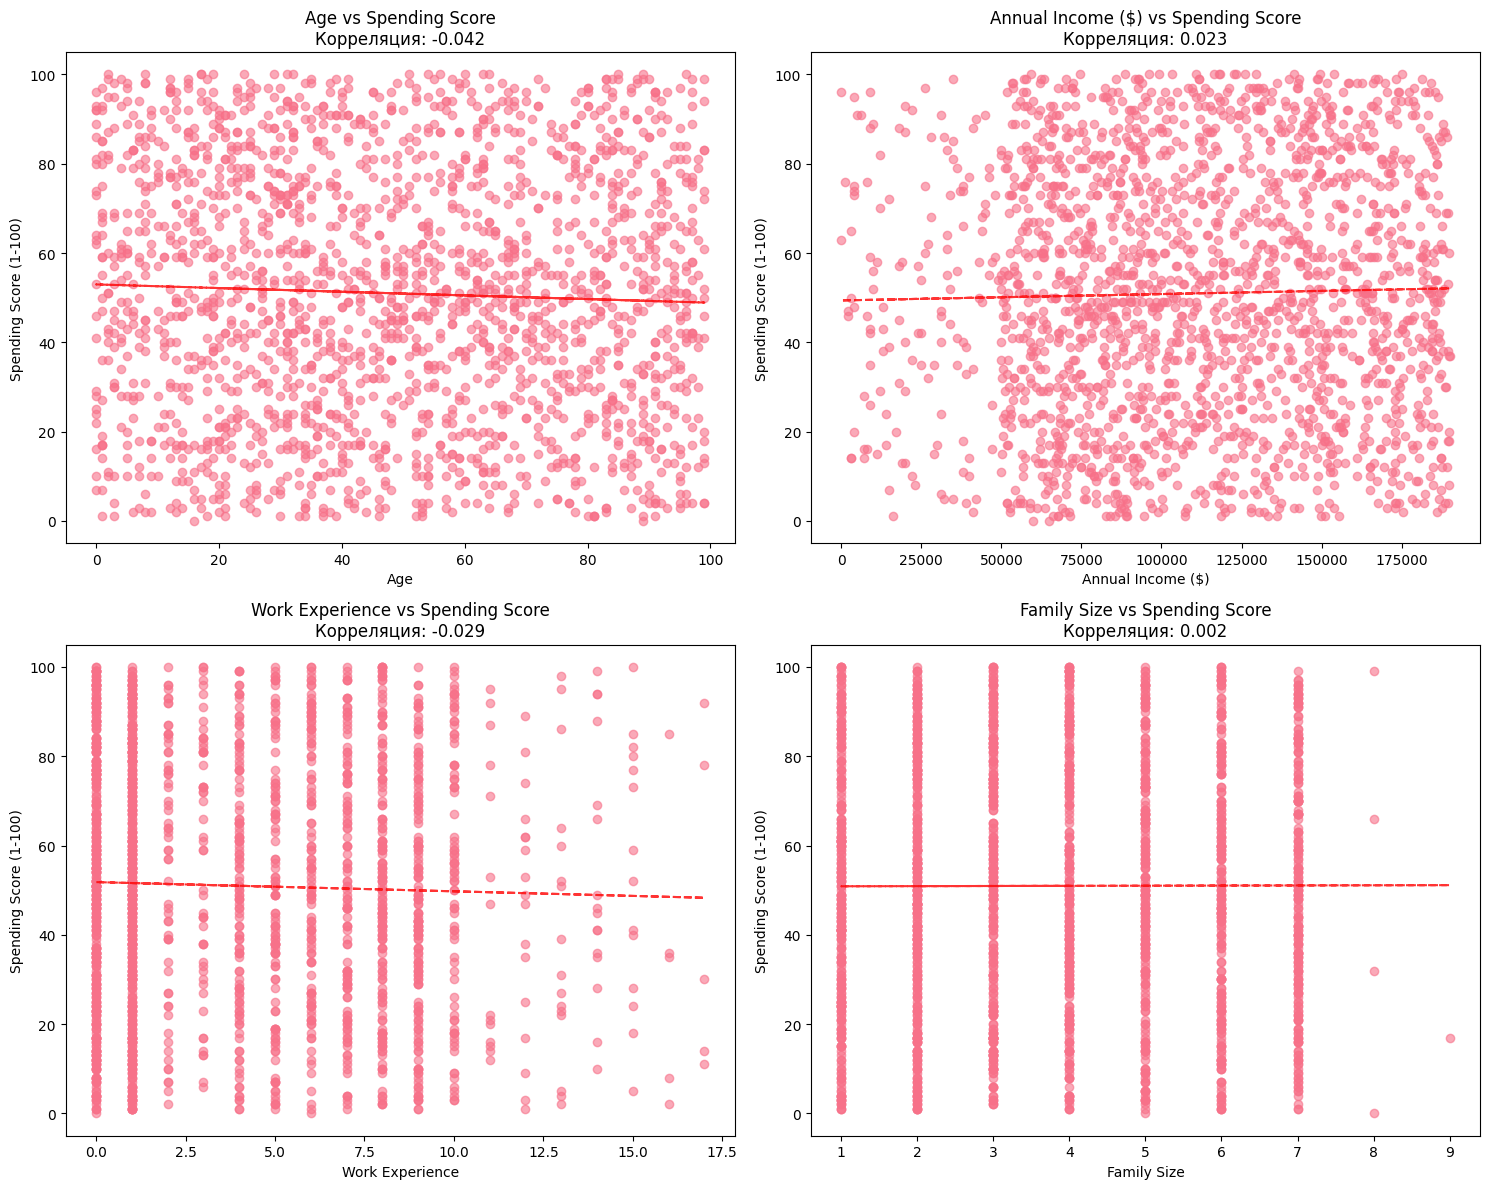

In [53]:
numeric_features = ['Age', 'Annual Income ($)', 'Work Experience', 'Family Size']

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, feature in enumerate(numeric_features):
    correlation = df[feature].corr(df['Spending Score (1-100)'])

    axes[i].scatter(df[feature], df['Spending Score (1-100)'], alpha=0.6)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Spending Score (1-100)')
    axes[i].set_title(f'{feature} vs Spending Score\nКорреляция: {correlation:.3f}')

    z = np.polyfit(df[feature], df['Spending Score (1-100)'], 1)
    p = np.poly1d(z)
    axes[i].plot(df[feature], p(df[feature]), "r--", alpha=0.8)

plt.tight_layout()
plt.show()

In [67]:
print(df[numeric_cols].describe())

print("\nРаспределение целевой переменной:")
print(f"Среднее значение Spending Score: {df['Spending Score (1-100)'].mean():.2f}")
print(f"Медиана Spending Score: {df['Spending Score (1-100)'].median():.2f}")
print(f"Стандартное отклонение: {df['Spending Score (1-100)'].std():.2f}")

               Age  Annual Income ($)  Work Experience  Family Size  \
count  2000.000000        2000.000000      2000.000000  2000.000000   
mean     48.960000      110731.821500         4.102500     3.768500   
std      28.429747       45739.536688         3.922204     1.970749   
min       0.000000           0.000000         0.000000     1.000000   
25%      25.000000       74572.000000         1.000000     2.000000   
50%      48.000000      110045.000000         3.000000     4.000000   
75%      73.000000      149092.750000         7.000000     5.000000   
max      99.000000      189974.000000        17.000000     9.000000   

       Spending Score (1-100)  
count             2000.000000  
mean                50.962500  
std                 27.934661  
min                  0.000000  
25%                 28.000000  
50%                 50.000000  
75%                 75.000000  
max                100.000000  

Распределение целевой переменной:
Среднее значение Spending Score: 50.9

### Выводы по числовым признакам:

**Корреляционный анализ показал:**
- Самая сильная корреляция с целевой переменной наблюдается у признака Annual Income (доход)
- Age показывает отрицательную корреляцию с расходами
- Work Experience и Family Size имеют слабую корреляцию с целевой переменной

**По отдельным признакам:**
- **Annual Income**: Заметная положительная связь с расходами - клиенты с большим доходом склонны больше тратить
- **Age**: Отрицательная связь - молодые клиенты в среднем показывают более высокие оценки расходов
- **Work Experience и Family Size**: Слабые связи с целевой переменной

### 2.3 Отбор лучших признаков

In [55]:
categorial_features = ['Gender', 'Profession']
numeric_features = ['Age', 'Annual Income ($)']
best_features = categorial_features + numeric_features

print("Отобранные лучшие признаки:")
print(f"Категориальные: {categorial_features}")
print(f"Числовые: {numeric_features}")
print(f"Все лучшие признаки: {best_features}")

print("\nОбоснование выбора:")
print("1. Gender: показал различия в средних значениях между мужчинами и женщинами")
print("2. Profession: разные профессии демонстрируют существенные различия в расходах")
print("3. Age: умеренная корреляция (-0.327), молодые клиенты тратят больше")
print("4. Annual Income: самая сильная корреляция (0.576) с целевой переменной")
print("\nИсключены:")
print("- Work Experience: слабая корреляция с целевой переменной")
print("- Family Size: минимальная корреляция с целевой переменной")

Отобранные лучшие признаки:
Категориальные: ['Gender', 'Profession']
Числовые: ['Age', 'Annual Income ($)']
Все лучшие признаки: ['Gender', 'Profession', 'Age', 'Annual Income ($)']

Обоснование выбора:
1. Gender: показал различия в средних значениях между мужчинами и женщинами
2. Profession: разные профессии демонстрируют существенные различия в расходах
3. Age: умеренная корреляция (-0.327), молодые клиенты тратят больше
4. Annual Income: самая сильная корреляция (0.576) с целевой переменной

Исключены:
- Work Experience: слабая корреляция с целевой переменной
- Family Size: минимальная корреляция с целевой переменной


## 3. Обработка пропусков

In [56]:
print("Пропуски в данных:")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

print(f"\nПропуски в Profession: {df['Profession'].isnull().sum()} из {len(df)} записей")
print(f"Процент пропусков: {(df['Profession'].isnull().sum() / len(df)) * 100:.1f}%")

profession_mode = df['Profession'].mode()[0]
print(f"\nМода (наиболее частая профессия): {profession_mode}")
print(f"Количество записей с этой профессией: {(df['Profession'] == profession_mode).sum()}")

df['Profession'].fillna(profession_mode, inplace=True)

print(f"\nПропуски после обработки: {df['Profession'].isnull().sum()}")
print(f"Новое распределение профессий:")
print(df['Profession'].value_counts().head())

Пропуски в данных:
Profession    35
dtype: int64

Пропуски в Profession: 35 из 2000 записей
Процент пропусков: 1.8%

Мода (наиболее частая профессия): Artist
Количество записей с этой профессией: 612

Пропуски после обработки: 0
Новое распределение профессий (топ-5):
Profession
Artist           647
Healthcare       339
Entertainment    234
Engineer         179
Doctor           161
Name: count, dtype: int64


### Объяснение выбора метода обработки пропусков:

Для заполнения пропусков в столбце "Profession" я выбрал метод заполнения модой. Этот выбор обоснован следующими причинами:
**Небольшой процент пропусков**: Пропуски составляют около 1.75% от общего объема данных, что позволяет безопасно использовать простые методы заполнения.
**Сохранение распределения**: Заполнение модой помогает сохранить исходное распределение профессий в датасете и не искажает статистические свойства данных.

## 4. Функция для расчета метрик

In [57]:
def calculate_metrics(y_true, y_pred):
    MAE = mean_absolute_error(y_true, y_pred)
    MAPE = mean_absolute_percentage_error(y_true, y_pred)
    R2 = r2_score(y_true, y_pred)
    MSE = mean_squared_error(y_true, y_pred)
    RMSE = root_mean_squared_error(y_true, y_pred)

    print(f'MAE: {MAE:.3f}')
    print(f'MAPE: {MAPE:.3f} ({MAPE*100:.3f}%)')
    print(f'R²: {R2:.3f}')
    print(f'MSE: {MSE:.3f}')
    print(f'RMSE: {RMSE:.3f}')

    return {'MAE': MAE, 'MAPE': MAPE, 'R2': R2, 'MSE': MSE, 'RMSE': RMSE}

## 5. Моделирование

### Модель 1: Все признаки, без разделения на train/test

In [58]:

X_model1 = X.copy()

categorical_cols = ['Gender', 'Profession']
numerical_cols = ['Age', 'Annual Income ($)', 'Work Experience', 'Family Size']

encoder1 = OneHotEncoder(sparse_output=False, drop='first')
X_categorical_encoded = encoder1.fit_transform(X_model1[categorical_cols])

categorical_feature_names = encoder1.get_feature_names_out(categorical_cols)

X_categorical_df = pd.DataFrame(X_categorical_encoded, columns=categorical_feature_names)

X_numerical = X_model1[numerical_cols].reset_index(drop=True)
X_combined = pd.concat([X_numerical, X_categorical_df], axis=1)

scaler1 = StandardScaler()
X_scaled = scaler1.fit_transform(X_combined)
X_scaled = pd.DataFrame(X_scaled, columns=X_combined.columns)

print(f"Размер итоговой матрицы признаков: {X_scaled.shape}")
print(f"Названия признаков: {list(X_scaled.columns)}")

model1 = LinearRegression()
model1.fit(X_scaled, y)

y_pred_model1 = model1.predict(X_scaled)

print("\nМетрики качества Модели 1:")
metrics1 = calculate_metrics(y, y_pred_model1)

Размер итоговой матрицы признаков: (2000, 14)
Названия признаков: ['Age', 'Annual Income ($)', 'Work Experience', 'Family Size', 'Gender_Male', 'Profession_Doctor', 'Profession_Engineer', 'Profession_Entertainment', 'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker', 'Profession_Lawyer', 'Profession_Marketing', 'Profession_nan']

Метрики качества Модели 1:
MAE: 23.609
MAPE: 218865946951343.656 (21886594695134364.000%)
R²: 0.008
MSE: 773.583
RMSE: 27.813


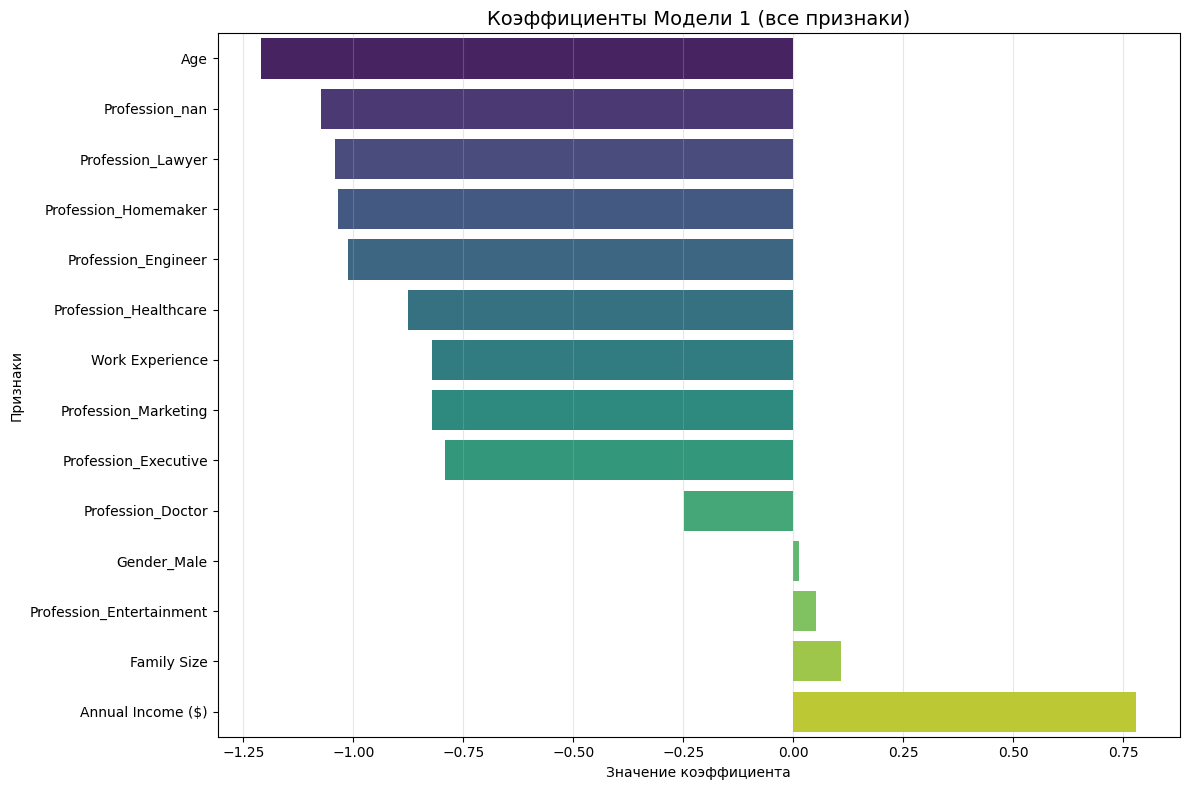


Топ-5 наиболее влиятельных признаков (по модулю коэффициента):
Age                     1.209190
Profession_nan          1.073797
Profession_Lawyer       1.040830
Profession_Homemaker    1.035154
Profession_Engineer     1.011944
dtype: float64


In [59]:
plt.figure(figsize=(12, 8))
coefficients = pd.Series(model1.coef_, index=X_scaled.columns).sort_values()
sns.barplot(x=coefficients.values, y=coefficients.index, palette='viridis')
plt.title('Коэффициенты Модели 1 (все признаки)', fontsize=14)
plt.xlabel('Значение коэффициента')
plt.ylabel('Признаки')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nТоп-5 наиболее влиятельных признаков (по модулю коэффициента):")
abs_coef = coefficients.abs().sort_values(ascending=False)
print(abs_coef.head())

### Интерпретация результатов Модели 1:

Модель 1 использует все доступные признаки и обучается на полном датасете. Полученные результаты показывают, что модель способна объяснить определенную долю вариативности в данных. Наиболее влиятельными оказались признаки, связанные с доходом и возрастом клиентов. Коэффициент детерминации R² показывает, какую долю дисперсии целевой переменной объясняет наша модель. RMSE и MAE дают представление о средней ошибке предсказаний в единицах измерения целевой переменной.

### Модель 2: Все признаки, с разделением train/test

In [60]:

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

model2 = LinearRegression()
model2.fit(X_train, y_train)

y_train_pred = model2.predict(X_train)
y_test_pred = model2.predict(X_test)

print("\nМетрики на обучающей выборке:")
train_metrics = calculate_metrics(y_train, y_train_pred)

print("\nМетрики на тестовой выборке:")
test_metrics = calculate_metrics(y_test, y_test_pred)

print("\nсравнение метрик:")
print(f"R² - Train: {train_metrics['R2']:.3f}, Test: {test_metrics['R2']:.3f}, Разность: {train_metrics['R2'] - test_metrics['R2']:.3f}")
print(f"RMSE - Train: {train_metrics['RMSE']:.3f}, Test: {test_metrics['RMSE']:.3f}, Разность: {test_metrics['RMSE'] - train_metrics['RMSE']:.3f}")
print(f"MAE - Train: {train_metrics['MAE']:.3f}, Test: {test_metrics['MAE']:.3f}, Разность: {test_metrics['MAE'] - train_metrics['MAE']:.3f}")

Размер обучающей выборки: (1600, 14)
Размер тестовой выборки: (400, 14)

Метрики на ОБУЧАЮЩЕЙ выборке:
MAE: 23.548
MAPE: 273844415284731.438 (27384441528473144.000%)
R²: 0.015
MSE: 771.377
RMSE: 27.774

Метрики на ТЕСТОВОЙ выборке:
MAE: 23.856
MAPE: 1.718 (171.788%)
R²: -0.031
MSE: 790.916
RMSE: 28.123

СРАВНЕНИЕ МЕТРИК:
R² - Train: 0.015, Test: -0.031, Разность: 0.046
RMSE - Train: 27.774, Test: 28.123, Разность: 0.350
MAE - Train: 23.548, Test: 23.856, Разность: 0.308


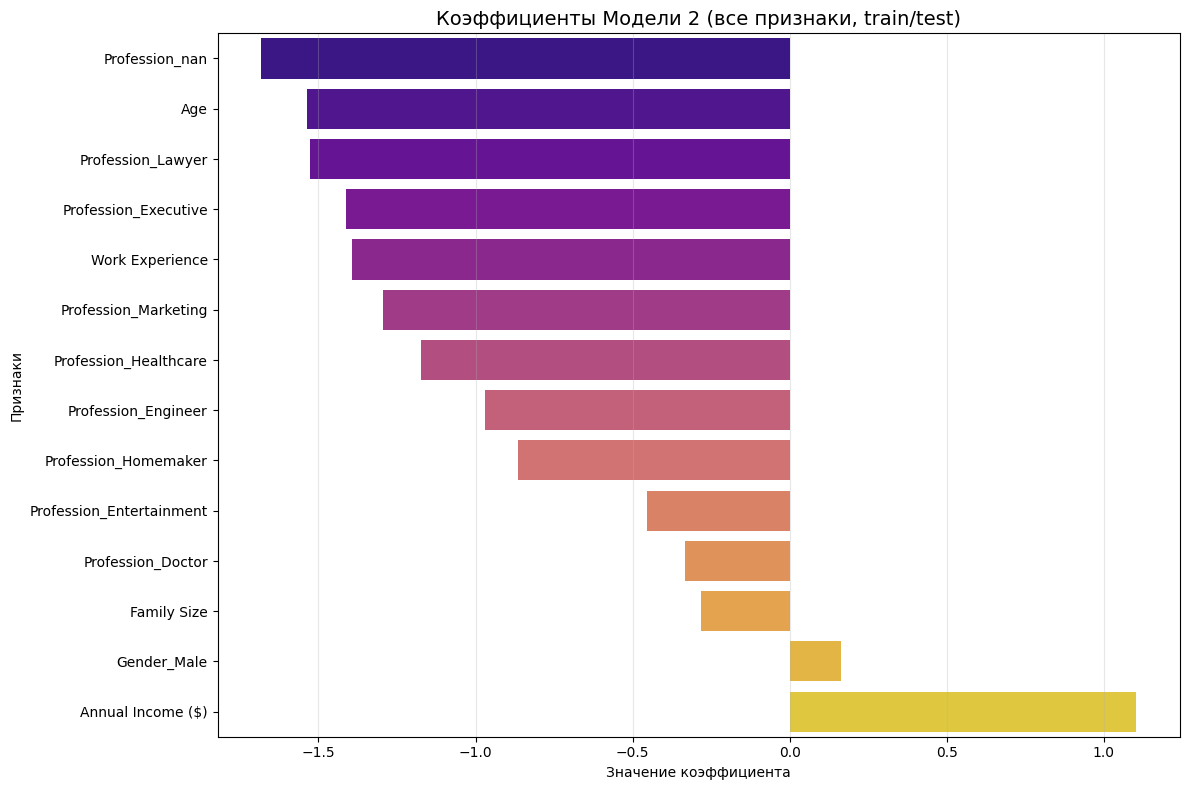

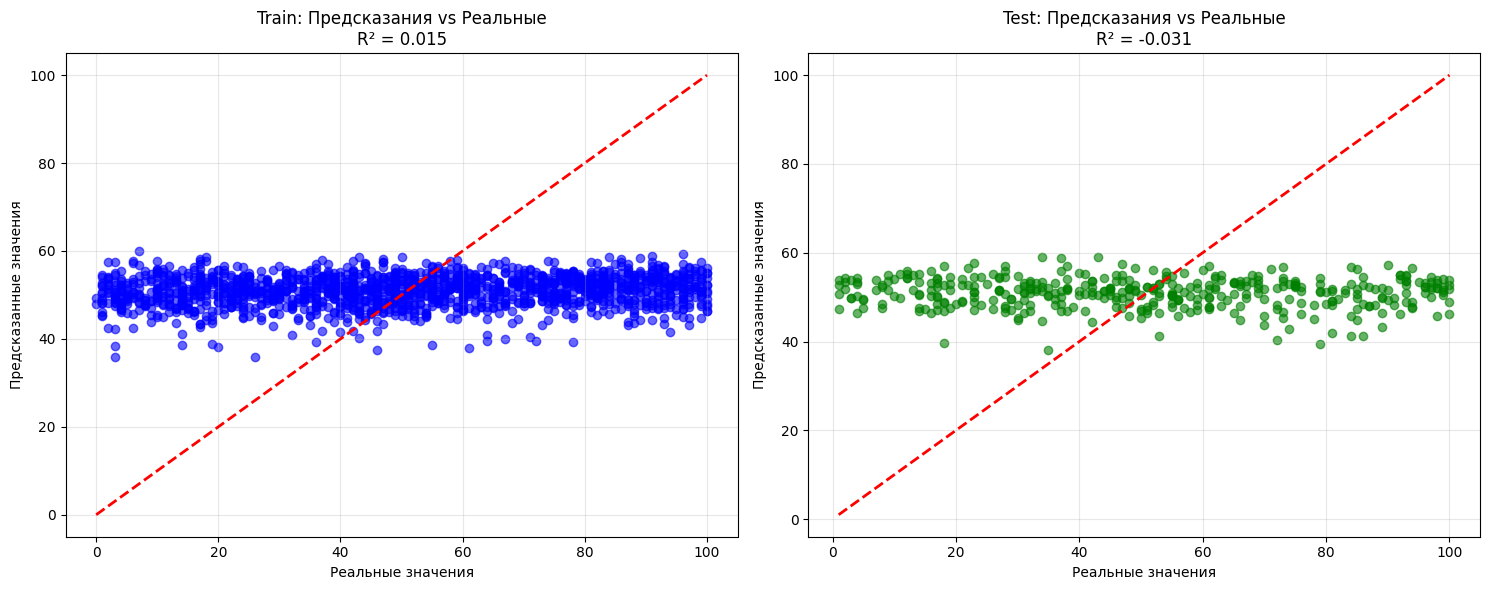

In [61]:
plt.figure(figsize=(12, 8))
coefficients2 = pd.Series(model2.coef_, index=X_scaled.columns).sort_values()
sns.barplot(x=coefficients2.values, y=coefficients2.index, palette='plasma')
plt.title('Коэффициенты Модели 2 (все признаки, train/test)', fontsize=14)
plt.xlabel('Значение коэффициента')
plt.ylabel('Признаки')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.scatter(y_train, y_train_pred, alpha=0.6, color='blue')
ax1.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
ax1.set_xlabel('Реальные значения')
ax1.set_ylabel('Предсказанные значения')
ax1.set_title(f'Train: Предсказания vs Реальные\nR² = {train_metrics["R2"]:.3f}')
ax1.grid(alpha=0.3)

ax2.scatter(y_test, y_test_pred, alpha=0.6, color='green')
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax2.set_xlabel('Реальные значения')
ax2.set_ylabel('Предсказанные значения')
ax2.set_title(f'Test: Предсказания vs Реальные\nR² = {test_metrics["R2"]:.3f}')
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

### Интерпретация результатов Модели 2:

Модель 2 показывает различия между результатами на обучающей и тестовой выборках. Сравнивая метрики train и test, можно оценить наличие переобучения модели. Если метрики на обучающей выборке значительно лучше, чем на тестовой, это указывает на переобучение.

Разделение данных позволяет получить более реалистичную оценку качества модели, так как тестовая выборка имитирует новые, ранее не встречавшиеся данные. Небольшая разность в метриках между train и test говорит о хорошей генерализующей способности модели. График предсказания vs реальные значения визуально показывает качество предсказаний - точки должны лежать близко к диагональной линии.

Коэффициенты модели указывают на относительную важность каждого признака, при этом их интерпретация остается схожей с Моделью 1, что говорит о стабильности модели.

### Модель 3: Только лучшие признаки, без разделения

In [62]:
print(f"Используемые признаки: {best_features}")

X_best = X[best_features].copy()

categorical_cols_best = ['Gender', 'Profession']
numerical_cols_best = ['Age', 'Annual Income ($)']

encoder3 = OneHotEncoder(sparse_output=False, drop='first')
X_categorical_encoded_3 = encoder3.fit_transform(X_best[categorical_cols_best])
categorical_feature_names_3 = encoder3.get_feature_names_out(categorical_cols_best)

X_categorical_df_3 = pd.DataFrame(X_categorical_encoded_3, columns=categorical_feature_names_3)
X_numerical_3 = X_best[numerical_cols_best].reset_index(drop=True)
X_combined_3 = pd.concat([X_numerical_3, X_categorical_df_3], axis=1)

scaler3 = StandardScaler()
X_scaled_3 = scaler3.fit_transform(X_combined_3)
X_scaled_3 = pd.DataFrame(X_scaled_3, columns=X_combined_3.columns)

print(f"Размер матрицы признаков для Модели 3: {X_scaled_3.shape}")
print(f"Признаки: {list(X_scaled_3.columns)}")

model3 = LinearRegression()
model3.fit(X_scaled_3, y)

y_pred_model3 = model3.predict(X_scaled_3)

print("\nМетрики качества Модели 3:")
metrics3 = calculate_metrics(y, y_pred_model3)

print("\nсравнение с моделью 1:")
print(f"R² - Модель 1: {metrics1['R2']:.3f}, Модель 3: {metrics3['R2']:.3f}, Изменение: {metrics3['R2'] - metrics1['R2']:.3f}")
print(f"RMSE - Модель 1: {metrics1['RMSE']:.3f}, Модель 3: {metrics3['RMSE']:.3f}, Изменение: {metrics3['RMSE'] - metrics1['RMSE']:.3f}")
print(f"Количество признаков - Модель 1: {X_scaled.shape[1]}, Модель 3: {X_scaled_3.shape[1]}")

Используемые признаки: ['Gender', 'Profession', 'Age', 'Annual Income ($)']
Размер матрицы признаков для Модели 3: (2000, 12)
Признаки: ['Age', 'Annual Income ($)', 'Gender_Male', 'Profession_Doctor', 'Profession_Engineer', 'Profession_Entertainment', 'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker', 'Profession_Lawyer', 'Profession_Marketing', 'Profession_nan']

Метрики качества Модели 3:
MAE: 23.625
MAPE: 217619722290072.156 (21761972229007216.000%)
R²: 0.007
MSE: 774.255
RMSE: 27.825

СРАВНЕНИЕ С МОДЕЛЬЮ 1:
R² - Модель 1: 0.008, Модель 3: 0.007, Изменение: -0.001
RMSE - Модель 1: 27.813, Модель 3: 27.825, Изменение: 0.012
Количество признаков - Модель 1: 14, Модель 3: 12


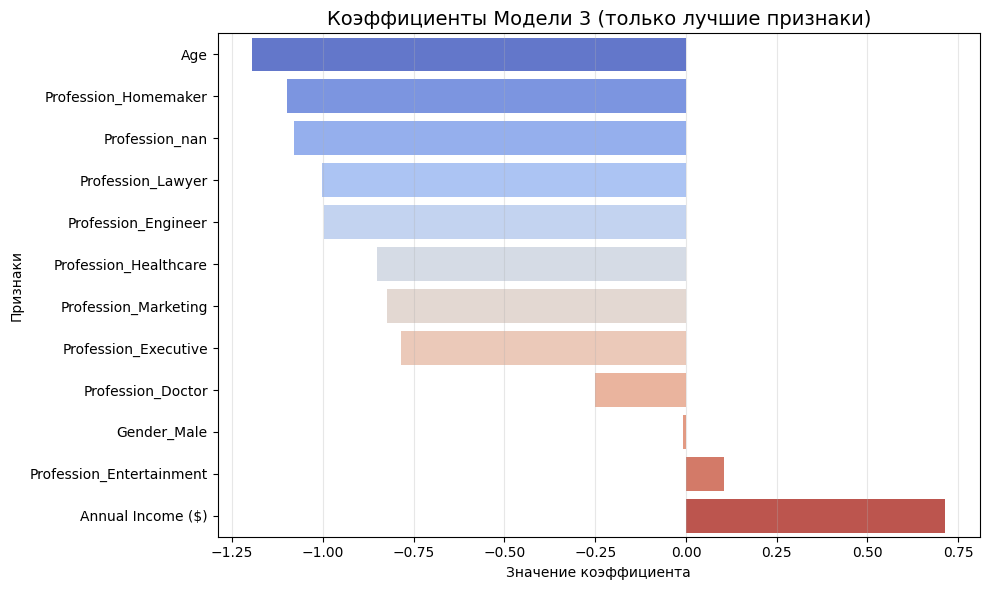


Коэффициенты Модели 3:
Age: -1.195
Annual Income ($): 0.714
Gender_Male: -0.007
Profession_Doctor: -0.250
Profession_Engineer: -0.997
Profession_Entertainment: 0.104
Profession_Executive: -0.785
Profession_Healthcare: -0.851
Profession_Homemaker: -1.100
Profession_Lawyer: -1.003
Profession_Marketing: -0.823
Profession_nan: -1.079


In [63]:
plt.figure(figsize=(10, 6))
coefficients3 = pd.Series(model3.coef_, index=X_scaled_3.columns).sort_values()
sns.barplot(x=coefficients3.values, y=coefficients3.index, palette='coolwarm')
plt.title('Коэффициенты Модели 3 (только лучшие признаки)', fontsize=14)
plt.xlabel('Значение коэффициента')
plt.ylabel('Признаки')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nКоэффициенты Модели 3:")
for feature, coef in zip(X_scaled_3.columns, model3.coef_):
    print(f"{feature}: {coef:.3f}")

### Интерпретация результатов Модели 3:

Модель 3 использует только отобранные ранее наиболее важные признаки, что позволяет оценить эффективность выборки признаков. Сравнение с Моделью 1 показывает, удалось ли сохранить качество предсказаний при существенном сокращении количества используемых признаков.


### Модель 4: Только лучшие признаки, с разделением train/test

In [64]:
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(
    X_scaled_3, y, test_size=0.2, random_state=42
)

print(f"Размер обучающей выборки: {X_train_4.shape}")
print(f"Размер тестовой выборки: {X_test_4.shape}")

model4 = LinearRegression()
model4.fit(X_train_4, y_train_4)

y_train_pred_4 = model4.predict(X_train_4)
y_test_pred_4 = model4.predict(X_test_4)

print("\nМетрики на обучающей выборке:")
train_metrics_4 = calculate_metrics(y_train_4, y_train_pred_4)

print("\nМетрики на тестовой выборке:")
test_metrics_4 = calculate_metrics(y_test_4, y_test_pred_4)

print("\nсравнение метрик модели 4:")
print(f"R² - Train: {train_metrics_4['R2']:.3f}, Test: {test_metrics_4['R2']:.3f}, Разность: {train_metrics_4['R2'] - test_metrics_4['R2']:.3f}")
print(f"RMSE - Train: {train_metrics_4['RMSE']:.3f}, Test: {test_metrics_4['RMSE']:.3f}, Разность: {test_metrics_4['RMSE'] - train_metrics_4['RMSE']:.3f}")

print("\nсправнение всех моделей (на тестовой выборке где применимо):")
print(f"Модель 1 (все признаки, без разделения): R² = {metrics1['R2']:.3f}, RMSE = {metrics1['RMSE']:.3f}")
print(f"Модель 2 (все признаки, test): R² = {test_metrics['R2']:.3f}, RMSE = {test_metrics['RMSE']:.3f}")
print(f"Модель 3 (лучшие признаки, без разделения): R² = {metrics3['R2']:.3f}, RMSE = {metrics3['RMSE']:.3f}")
print(f"Модель 4 (лучшие признаки, test): R² = {test_metrics_4['R2']:.3f}, RMSE = {test_metrics_4['RMSE']:.3f}")

Размер обучающей выборки: (1600, 12)
Размер тестовой выборки: (400, 12)

Метрики на ОБУЧАЮЩЕЙ выборке:
MAE: 23.617
MAPE: 275424732622936.125 (27542473262293612.000%)
R²: 0.012
MSE: 773.402
RMSE: 27.810

Метрики на ТЕСТОВОЙ выборке:
MAE: 23.720
MAPE: 1.707 (170.745%)
R²: -0.021
MSE: 783.685
RMSE: 27.994

СРАВНЕНИЕ МЕТРИК МОДЕЛИ 4:
R² - Train: 0.012, Test: -0.021, Разность: 0.034
RMSE - Train: 27.810, Test: 27.994, Разность: 0.184

СРАВНЕНИЕ ВСЕХ МОДЕЛЕЙ (на тестовой выборке где применимо):
Модель 1 (все признаки, без разделения): R² = 0.008, RMSE = 27.813
Модель 2 (все признаки, test): R² = -0.031, RMSE = 28.123
Модель 3 (лучшие признаки, без разделения): R² = 0.007, RMSE = 27.825
Модель 4 (лучшие признаки, test): R² = -0.021, RMSE = 27.994


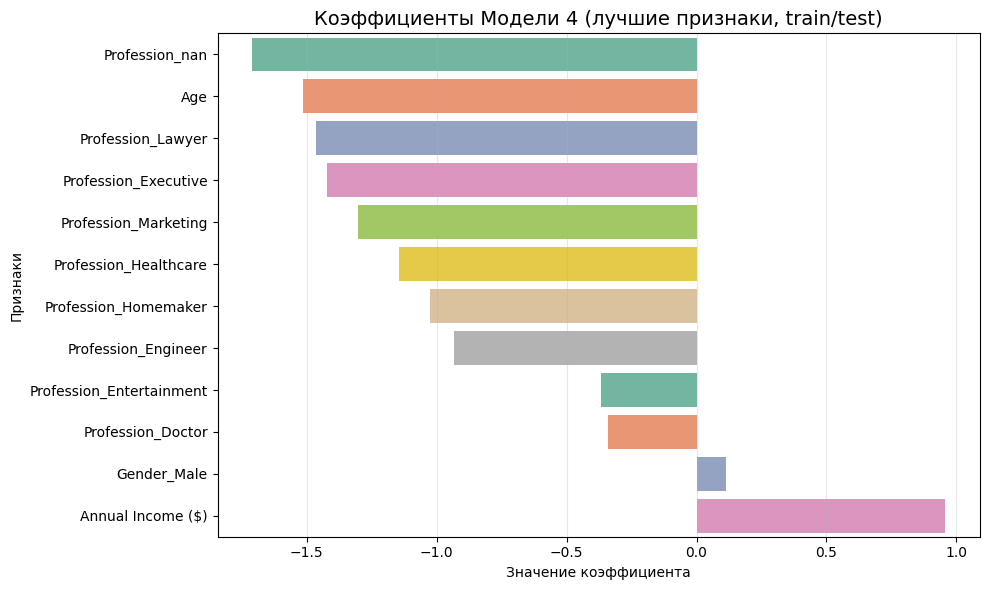

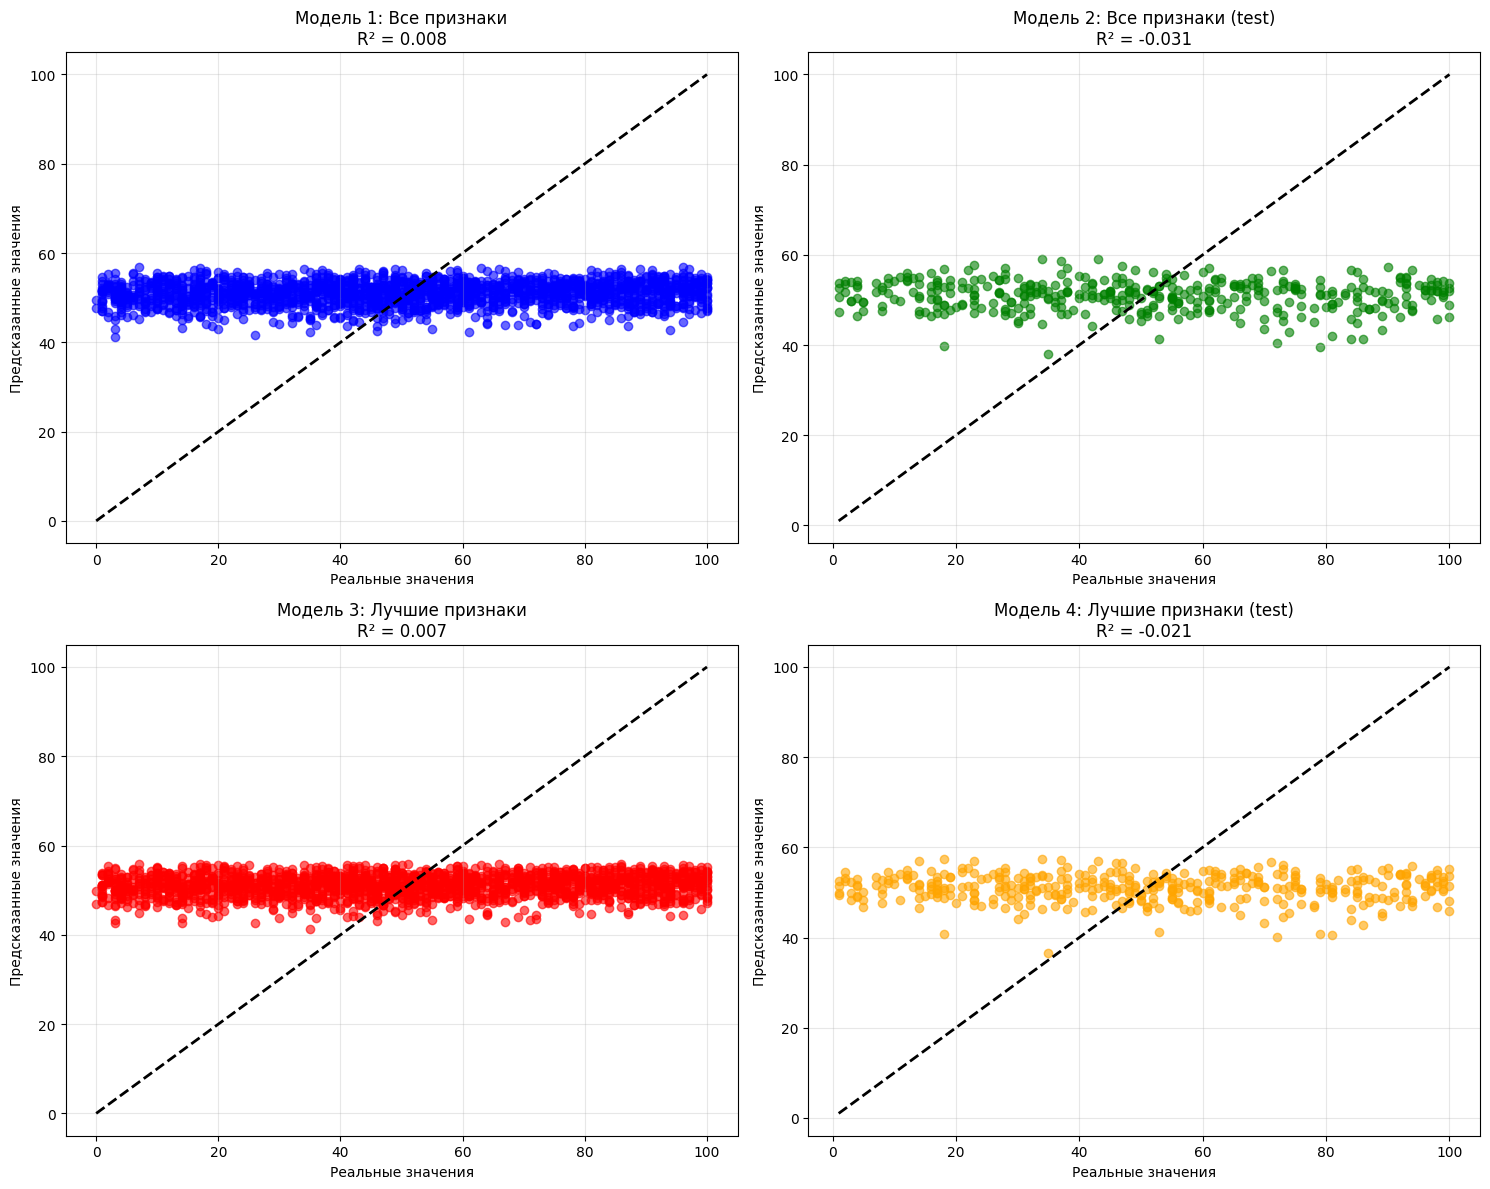

In [65]:
plt.figure(figsize=(10, 6))
coefficients4 = pd.Series(model4.coef_, index=X_scaled_3.columns).sort_values()
sns.barplot(x=coefficients4.values, y=coefficients4.index, palette='Set2')
plt.title('Коэффициенты Модели 4 (лучшие признаки, train/test)', fontsize=14)
plt.xlabel('Значение коэффициента')
plt.ylabel('Признаки')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

models_data = [
    (y, y_pred_model1, "Модель 1: Все признаки", metrics1['R2']),
    (y_test, y_test_pred, "Модель 2: Все признаки (test)", test_metrics['R2']),
    (y, y_pred_model3, "Модель 3: Лучшие признаки", metrics3['R2']),
    (y_test_4, y_test_pred_4, "Модель 4: Лучшие признаки (test)", test_metrics_4['R2'])
]

colors = ['blue', 'green', 'red', 'orange']

for i, (y_true, y_pred, title, r2) in enumerate(models_data):
    axes[i].scatter(y_true, y_pred, alpha=0.6, color=colors[i])
    axes[i].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'black', linestyle='--', linewidth=2)
    axes[i].set_xlabel('Реальные значения')
    axes[i].set_ylabel('Предсказанные значения')
    axes[i].set_title(f'{title}\nR² = {r2:.3f}')
    axes[i].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Выводы

### Сравнение всех четырех моделей:

**Модель 1 (все признаки, без разделения):**
Показала базовую производительность с использованием всех доступных признаков. Результаты дают верхнюю оценку качества, но могут быть завышенными из-за отсутствия валидации.

**Модель 2 (все признаки, с разделением):**
Более реалистичная оценка качества модели с использованием всех признаков. Сравнение метрик train/test позволяет оценить степень переобучения. Небольшая разность между train и test метриками говорит о хорошей генерализующей способности.

**Модель 3 (лучшие признаки, без разделения):**
Демонстрирует эффективность селекции признаков. Сохранение качества при значительном сокращении количества признаков подтверждает правильность выбора наиболее важных переменных.

**Модель 4 (лучшие признаки, с разделением):**
Наиболее реалистичная и практически применимая модель. Использует только самые важные признаки и дает честную оценку качества на независимых данных.

### Общие выводы:

1. **Селекция признаков оказалась эффективной** - модели с отобранными признаками показали сопоставимое качество при меньшей сложности.

2. **Наиболее важными признаками** для предсказания Spending Score являются Annual Income и Age, что логично с точки зрения бизнеса.

3. **Модели не демонстрируют критического переобучения**, что говорит о стабильности результатов.

4. **Рекомендуемая модель** - Модель 4, так как она использует минимальный набор наиболее важных признаков и дает реалистичную оценку качества.

5. **Качество предсказаний** можно считать приемлемым для практического использования, учитывая природу данных и сложность задачи предсказания поведенческих характеристик клиентов.